# Solenoid Example

Simple solenoid example


In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# locate the drift template
from impact import Impact, template_dir

ifile1d = os.path.join(template_dir, 'solenoid/ImpactT_solenoid_1d.in')
ifile2d = os.path.join(template_dir, 'solenoid/ImpactT_solenoid_2d.in')

os.path.exists(ifile1d), os.path.exists(ifile2d)

(True, True)

# Use Impact's built-in Gaussian particle generator

In [3]:
I1 = Impact(ifile1d)
I2 = Impact(ifile2d)

# Turn off SC
I1['total_charge'] = 0
I2['total_charge'] = 0
print(I1)

================ Impact-T Summary ================    
10000 particles
1 bunch of electrons
total charge: 0.0 pC
Distribution type: gauss3
Free space start
Processor domain: 1 x 1 = 1 CPUs
Space charge grid: 32 x 32 x 32
Maximum time steps: 1000000
Reference Frequency: 1000000000.0 Hz
Initial reference time: 0.0 s
Simulation starting from the beginning
Impact-T configured in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpwdmfwirb


CPU times: user 439 ms, sys: 56.2 ms, total: 495 ms
Wall time: 19.6 s


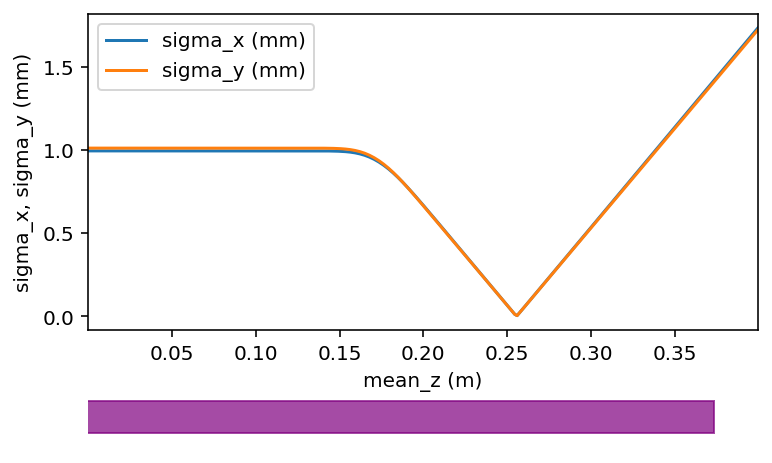

In [4]:
%%time
I1['total_charge'] = 0
I1.run()
I1.plot()

CPU times: user 871 ms, sys: 75.7 ms, total: 947 ms
Wall time: 3.31 s


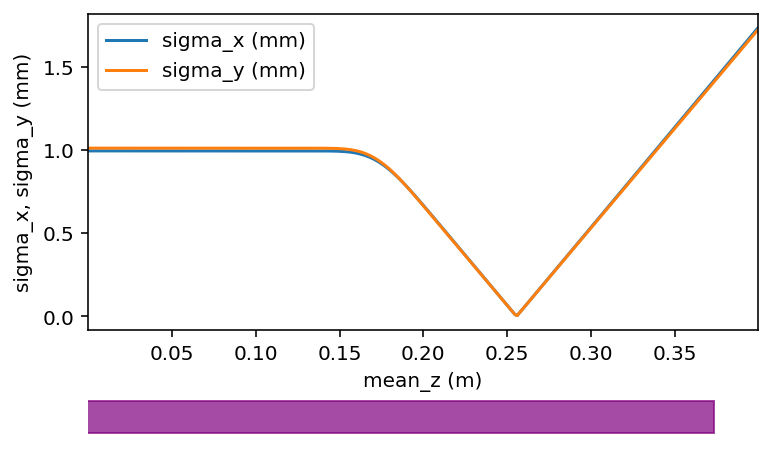

In [5]:
%%time
I2['total_charge'] = 0
I2.run()
I2.plot()

# Single particle tracking

In [6]:
%%time
P1 = I1.track1(s=0.5, z0 = 0, x0=0.019, pz0=3e6)


CPU times: user 50.5 ms, sys: 23.4 ms, total: 73.9 ms
Wall time: 121 ms


# Compare 1D and 2D maps

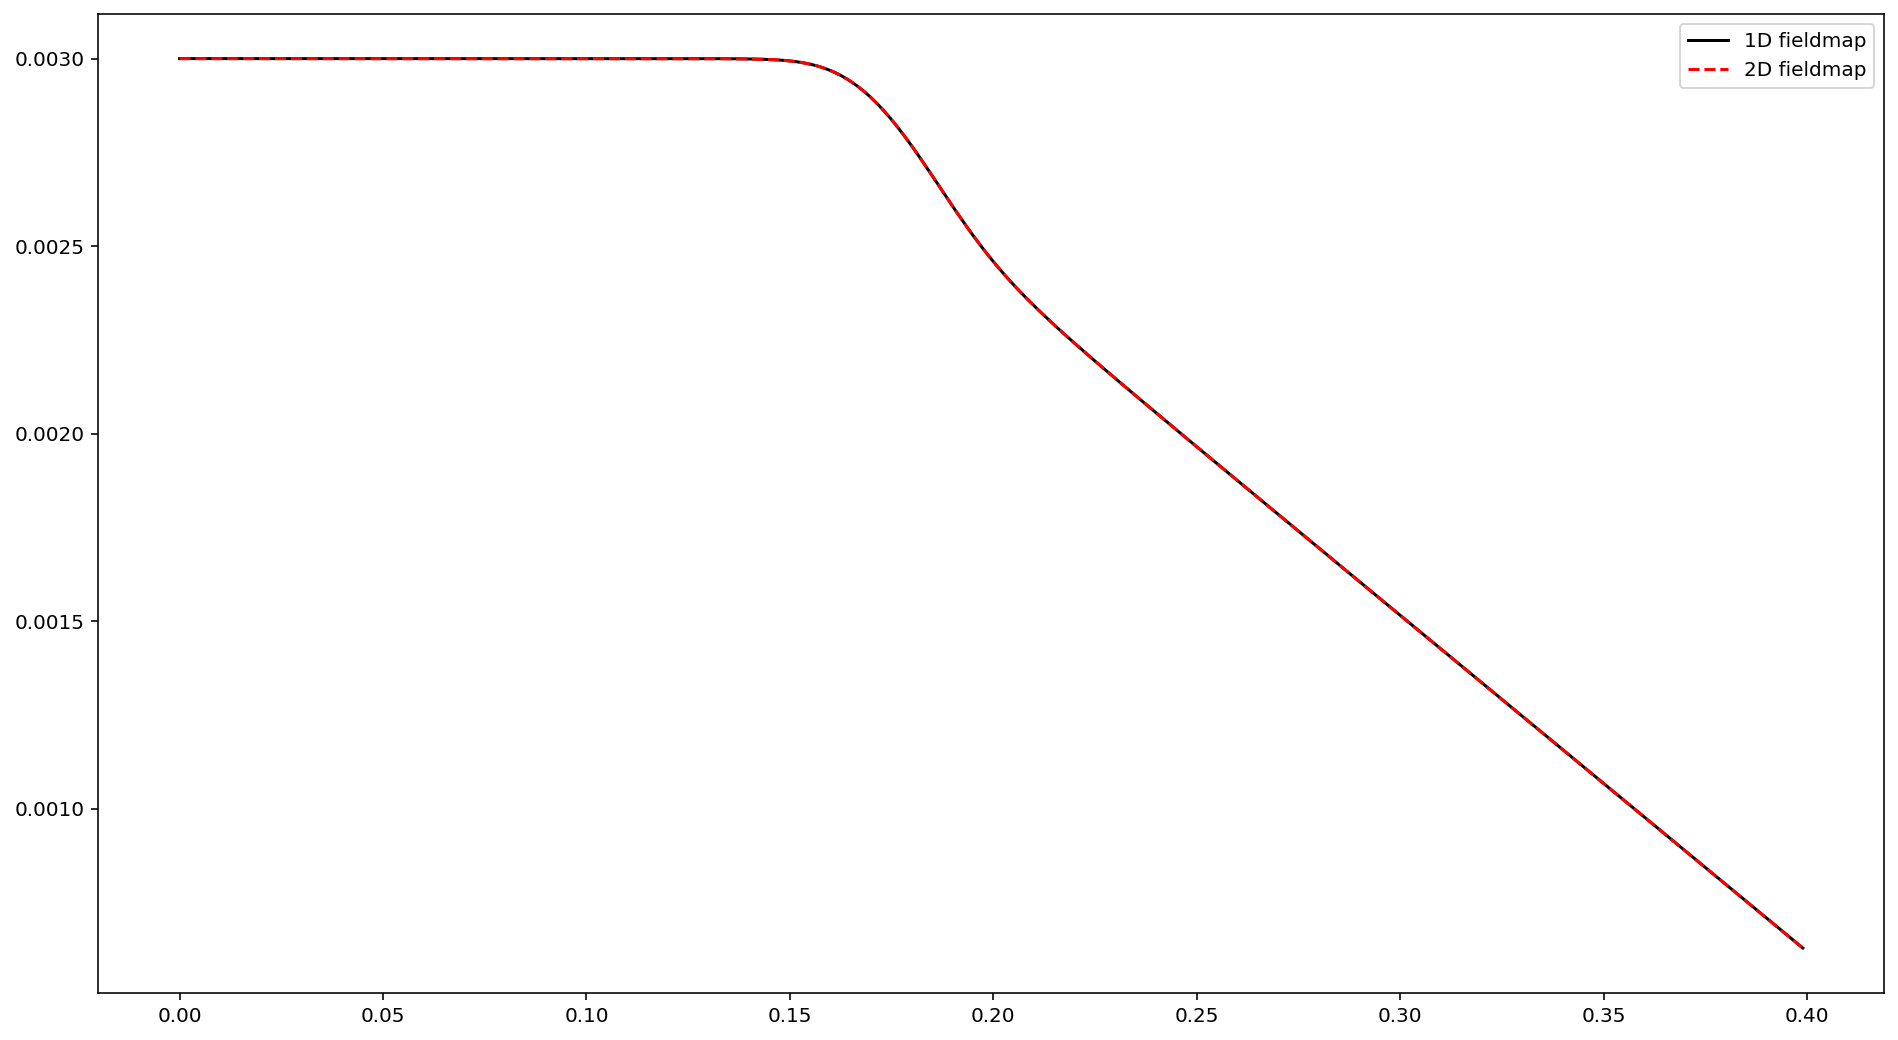

In [7]:
X0 = 0.003

I1.track1(s=0.4, x0=X0, pz0=3e6)
I2.track1(s=0.4, x0=X0, pz0=3e6)

k1 = 'mean_z'
k2 = 'mean_x'

x1 = I1.stat(k1)
y1 = I1.stat(k2)

x2 = I2.stat(k1)
y2 = I2.stat(k2)

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(x1, y1, color='black', label='1D fieldmap')
ax.plot(x2, y2, color='red', linestyle='--', label='2D fieldmap')
ax.legend()

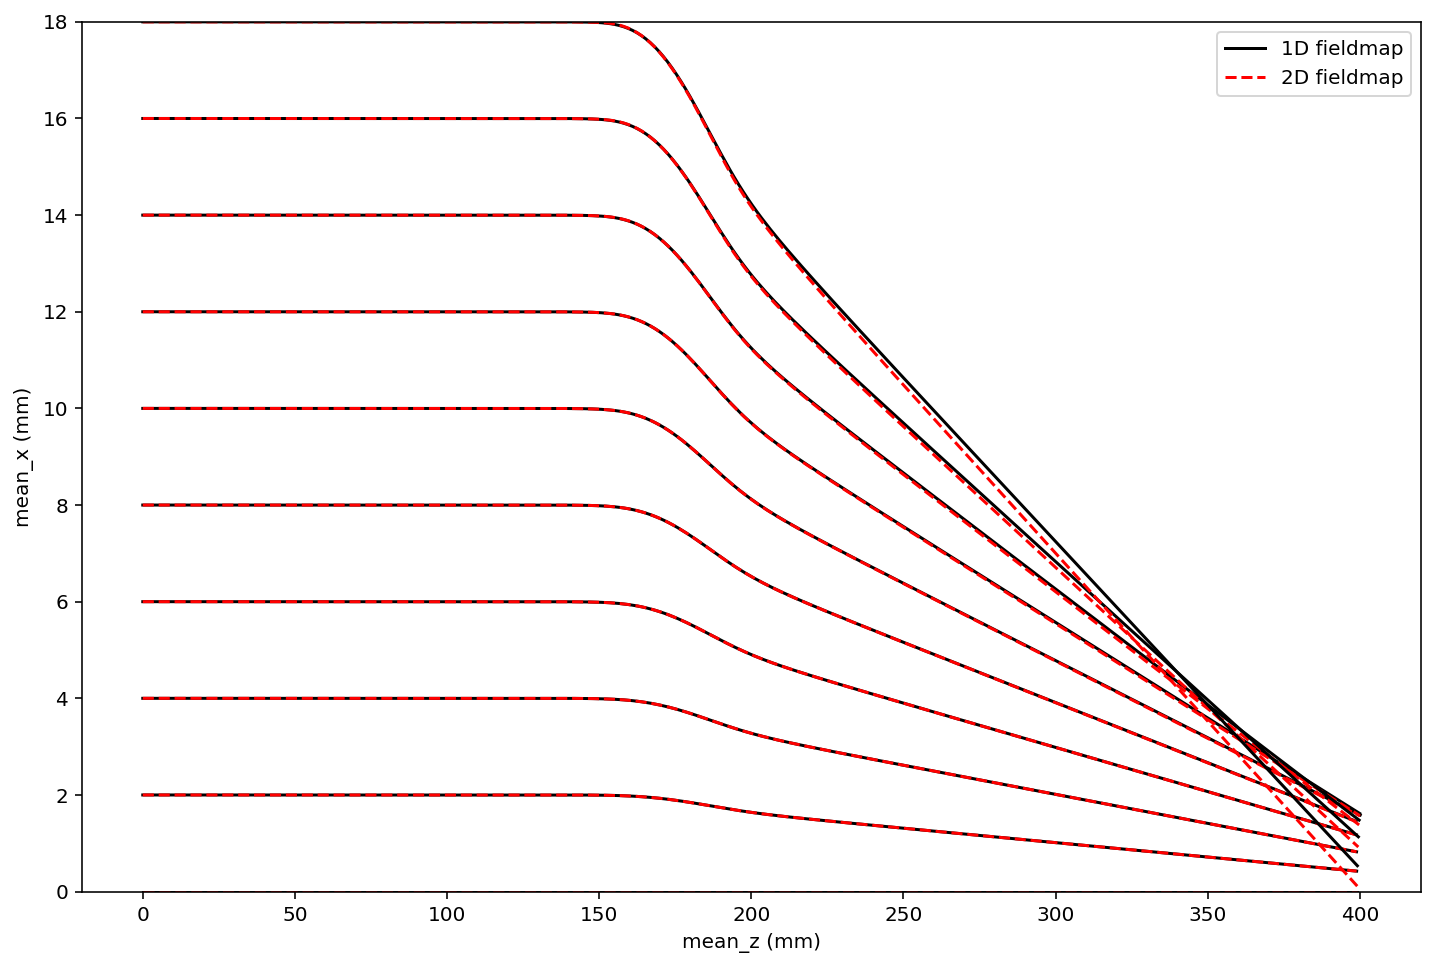

In [8]:

fig, ax = plt.subplots(figsize=(12,8))

k1 = 'mean_z'
k2 = 'mean_x'

f1 = 1e3
f2 = 1e3
u1 = 'mm'
u2 = 'mm'

for X0 in np.linspace(0, 0.018, 10):
    I1.track1(s=0.4, x0=X0, pz0=3e6)
    I2.track1(s=0.4, x0=X0, pz0=3e6)
    

    
    x1 = I1.stat(k1)
    y1 = I1.stat(k2)
    
    x2 = I2.stat(k1)
    y2 = I2.stat(k2)
    

    if X0 ==0:
        label1='1D fieldmap'
        label2='2D fieldmap'
    else:
        label1=None
        label2=None
    
    ax.plot(x1*f1, y1*f2, color='black', label=label1)
    ax.plot(x2*f1, y2*f2, color='red', linestyle='--', label=label2)

ax.set_ylim(0, 18)    
ax.set_xlabel(f'{k1} ({u1})')
ax.set_ylabel(f'{k2} ({u2})')
ax.legend()

# Track beam

In [9]:
I1 = Impact(ifile1d)
I2 = Impact(ifile2d)

# Turn off SC
I1['total_charge'] = 0
I2['total_charge'] = 0
I1.run()
I2.run()

In [10]:
I1.output['stats'].keys()

dict_keys(['t', 'mean_z', 'moment4_x', 'moment4_y', 'moment4_z', 'mean_y', 'sigma_y', 'norm_emit_y', 'mean_x', 'sigma_x', 'norm_emit_x', 'sigma_z', 'norm_emit_z', 'loadbalance_min_n_particle', 'loadbalance_max_n_particle', 'n_particle', 'moment3_x', 'moment3_y', 'moment3_z', 'mean_gamma', 'mean_beta', 'max_r', 'sigma_gamma', 'max_amplitude_x', 'max_amplitude_y', 'max_amplitude_z', 'moment4_px', 'moment4_py', 'moment4_pz', 'mean_py', 'sigma_py', 'cov_y__py', 'mean_px', 'sigma_px', 'cov_x__px', 'mean_pz', 'sigma_pz', 'cov_z__pz', 'moment3_px', 'moment3_py', 'moment3_pz', 'mean_kinetic_energy', 'max_amplitude_px', 'max_amplitude_py', 'max_amplitude_pz'])

In [11]:
PI = I1.particles['initial_particles']
PF = I1.particles['final_particles']
PI['sigma_y']

0.0010106410879665382

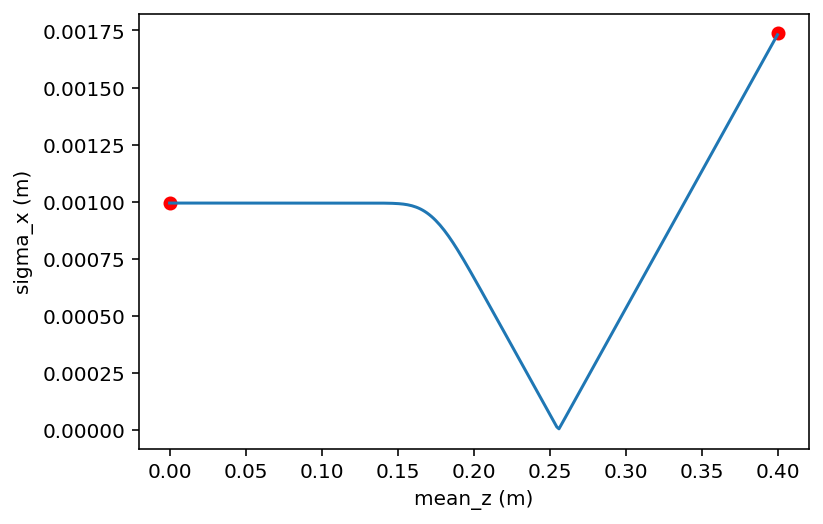

In [12]:
# Compare these. 
key1 = 'mean_z'
key2 = 'sigma_x'
units1 = str(I1.units(key1))
units2 = str(I1.units(key2))
plt.xlabel(key1+f' ({units1})')
plt.ylabel(key2+f' ({units2})')
plt.plot(I1.stat(key1), I1.stat(key2))
plt.scatter(
    [I1.particles[name][key1] for name in I1.particles], 
    [I2.particles[name][key2] for name in I2.particles], color='red')


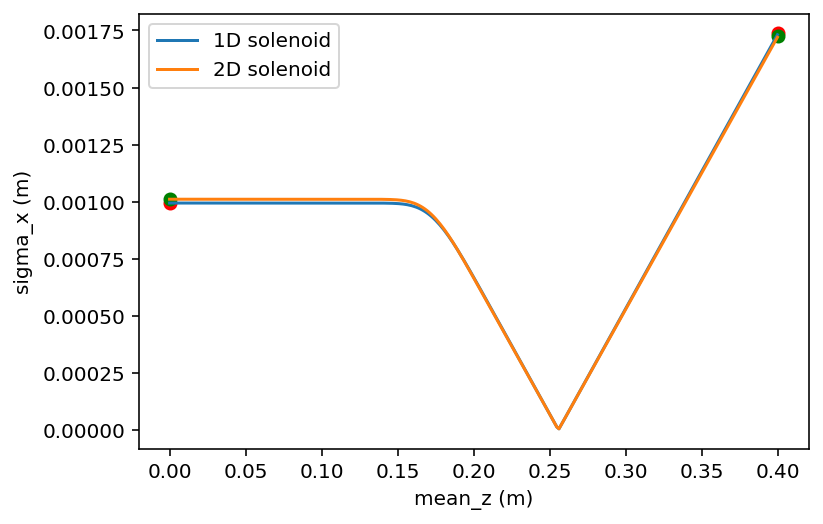

In [13]:
# Compare these. 
key1 = 'mean_z'
key2 = 'sigma_x'
units1 = str(I1.units(key1))
units2 = str(I1.units(key2))
plt.xlabel(key1+f' ({units1})')
plt.ylabel(key2+f' ({units2})')
plt.plot(I1.stat(key1), I1.stat(key2), label='1D solenoid')
plt.scatter(
    [I1.particles[name][key1] for name in I1.particles], 
    [I1.particles[name][key2] for name in I1.particles], color='red')
key2 = 'sigma_y'
plt.plot(I2.stat(key1), I2.stat(key2), label='2D solenoid')
plt.scatter(
    [I2.particles[name][key1] for name in I2.particles], 
    [I2.particles[name][key2] for name in I2.particles], color='green')
plt.legend()

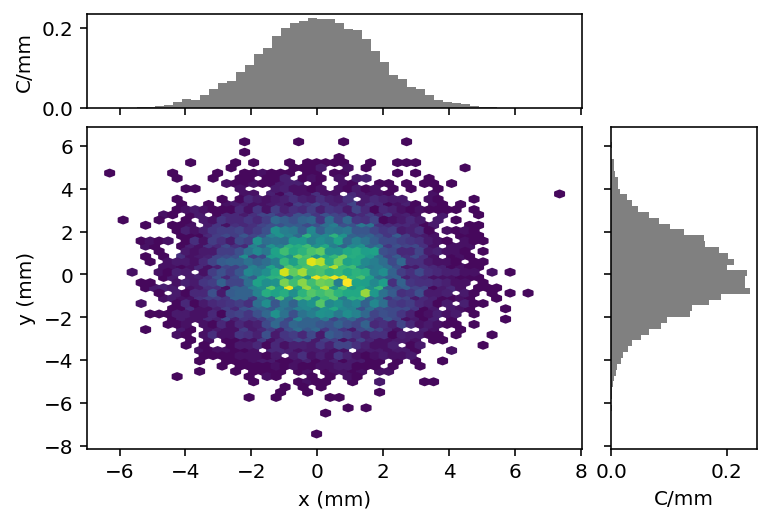

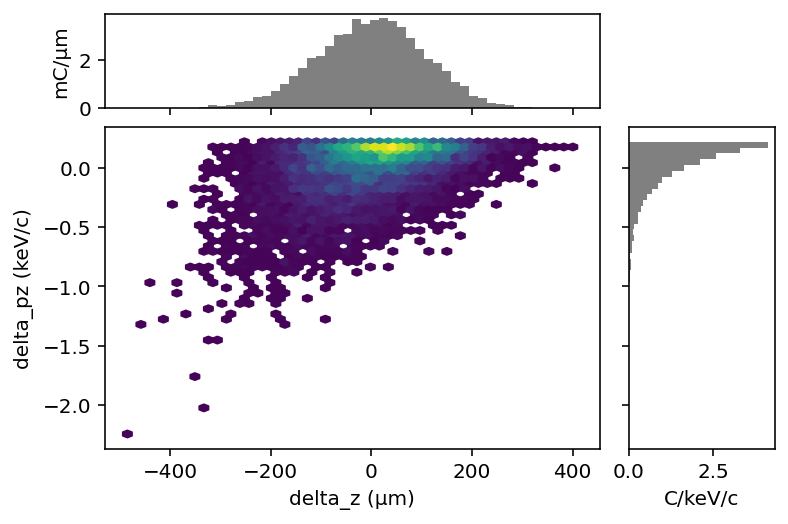

In [14]:
PF.plot('x', 'y')
PF.plot('delta_z', 'delta_pz')